# Import des outils / jeu de données

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from column_names import id_col, quali_var, quanti_var, target
from exploratory_analysis import (
    plot_correlation_matrix,
    plot_distributions_quali,
    plot_distributions_quanti,
    plot_na_quanti,
)

In [ ]:
np.random.seed(0)
sns.set_theme()

In [ ]:
df = pd.read_csv(
    "data/dataset/raw/train.csv",
    index_col=id_col,
)

# Présentation

## Jeu de données

### Lecture des données

### Présentation des variables

In [ ]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [ ]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 23 variables et 159256 individus.


In [ ]:
for c in df.columns:
    print(f'"{c}",')

"age",
"height(cm)",
"weight(kg)",
"waist(cm)",
"eyesight(left)",
"eyesight(right)",
"hearing(left)",
"hearing(right)",
"systolic",
"relaxation",
"fasting blood sugar",
"Cholesterol",
"triglyceride",
"HDL",
"LDL",
"hemoglobin",
"Urine protein",
"serum creatinine",
"AST",
"ALT",
"Gtp",
"dental caries",
"smoking",


#### Variables

#### Conversion de type

In [ ]:
df[quali_var] = (
    df[quali_var].astype(str).astype("category")
)  # todo: convertir uniquement les variables INT en category

In [ ]:
X = df.copy()[quanti_var + quali_var]
y = df.copy()[target]

In [ ]:
df[quanti_var].head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
id,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1.0,22,25,27
1,70,165,65,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1.1,27,23,37
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,0.8,27,31,53
3,35,180,95,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1.0,20,27,30
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,0.8,19,13,17


In [ ]:
df[quali_var].head()

,Urine protein,dental caries,hearing(left),hearing(right)
id,,,,
0,1,0,1,1
1,1,1,2,2
2,1,0,1,1
3,1,1,1,1
4,1,0,1,1


In [ ]:
df[target].head()

id
0    1
1    0
2    1
3    0
4    1
Name: smoking, dtype: int64

# Découverte des données

## Analyse univariée

In [ ]:
df.nunique()

age                     18
height(cm)              14
weight(kg)              28
waist(cm)              531
eyesight(left)          20
eyesight(right)         17
hearing(left)            2
hearing(right)           2
systolic               112
relaxation              75
fasting blood sugar    229
Cholesterol            227
triglyceride           392
HDL                    108
LDL                    222
hemoglobin             134
Urine protein            6
serum creatinine        28
AST                    140
ALT                    188
Gtp                    362
dental caries            2
smoking                  2
dtype: int64

In [ ]:
df[quanti_var].describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,0.892764,25.516853,26.550296,36.216004
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.179346,9.464882,17.753070,31.204643
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,0.100000,6.000000,1.000000,2.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,0.800000,20.000000,16.000000,18.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,0.900000,24.000000,22.000000,27.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,29.000000,32.000000,44.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,9.900000,778.000000,2914.000000,999.000000


In [ ]:
df[quali_var].describe()

,Urine protein,dental caries,hearing(left),hearing(right)
count,159256,159256,159256,159256
unique,6,2,2,2
top,1,0,1,1
freq,150862,127724,155438,155526


# Visualisation

## Variables quantitatives

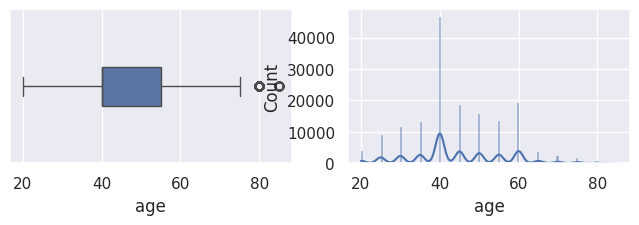

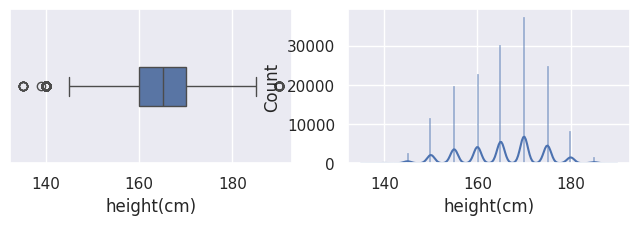

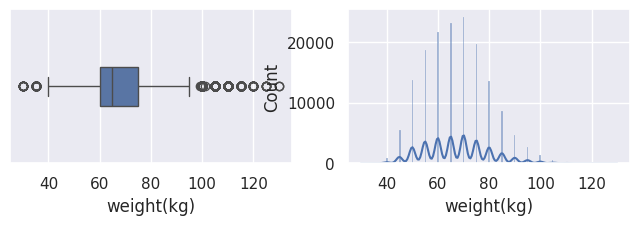

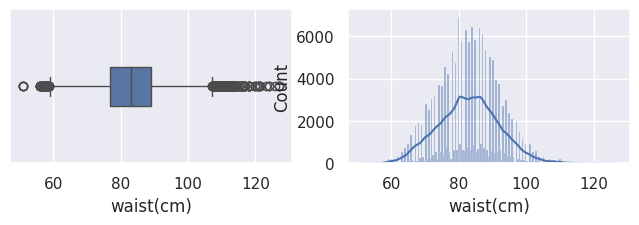

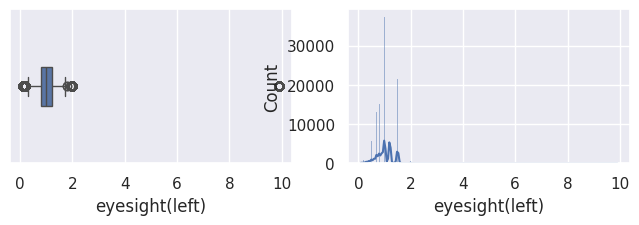

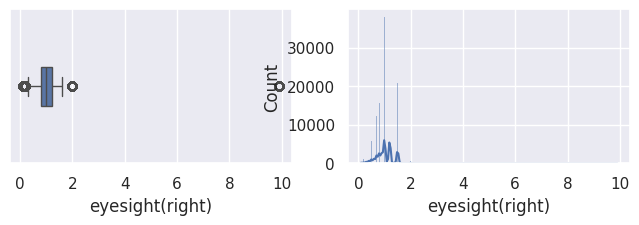

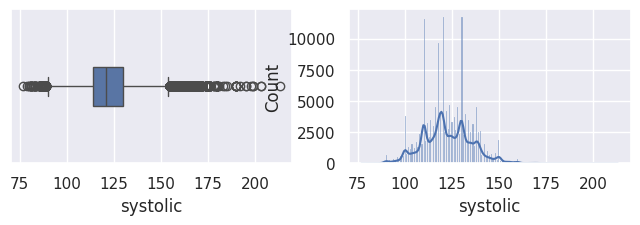

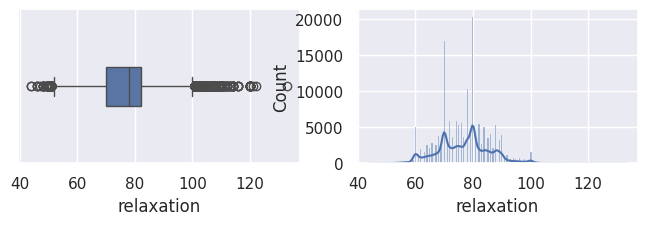

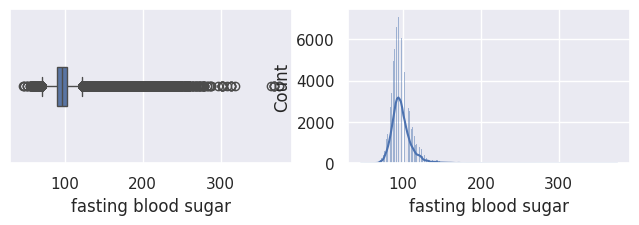

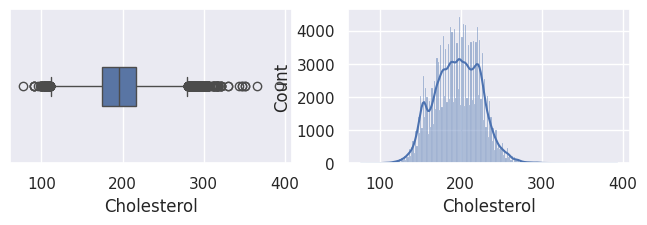

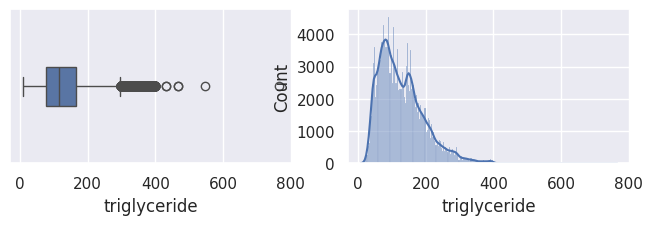

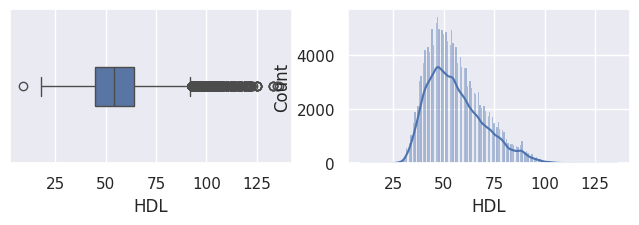

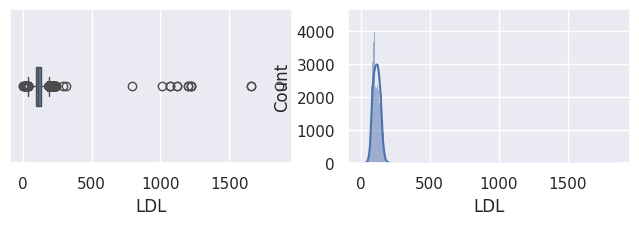

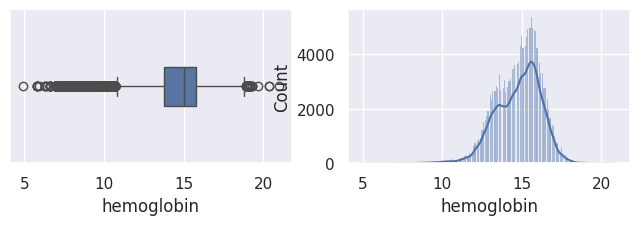

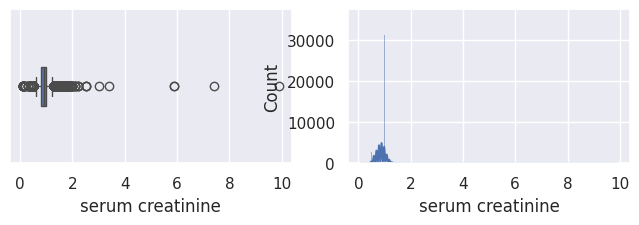

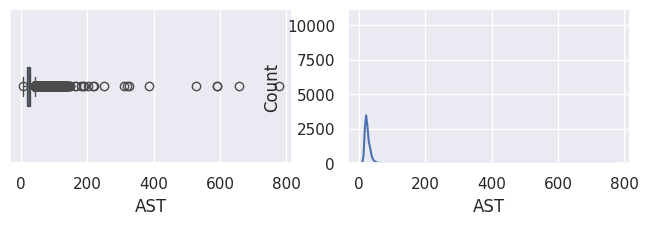

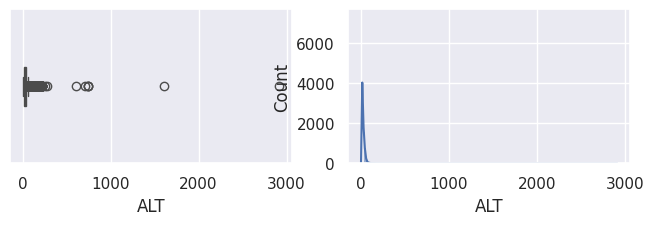

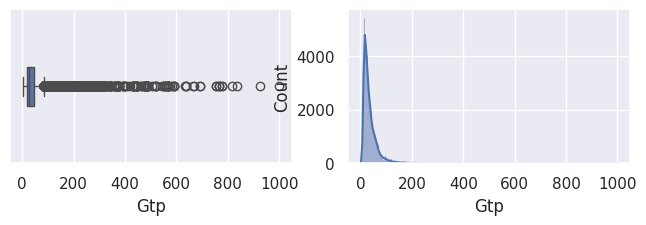

In [ ]:
plot_distributions_quanti(df[quanti_var])

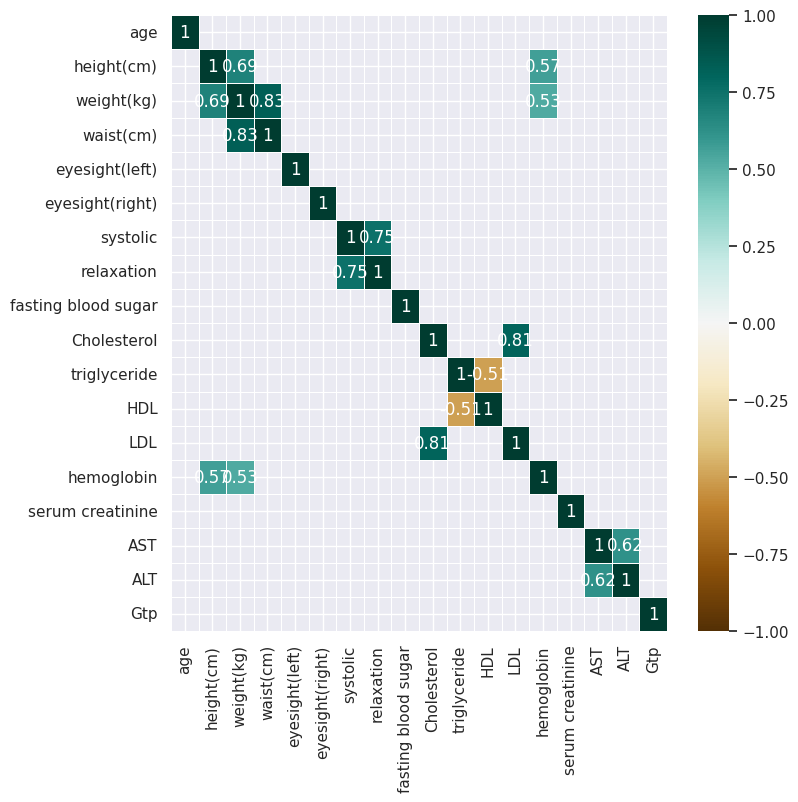

In [ ]:
plot_correlation_matrix(df[quanti_var])

### Valeurs manquantes

In [ ]:
plot_na_quanti(df[quanti_var])

There are no missing values.


## Variables qualitatives

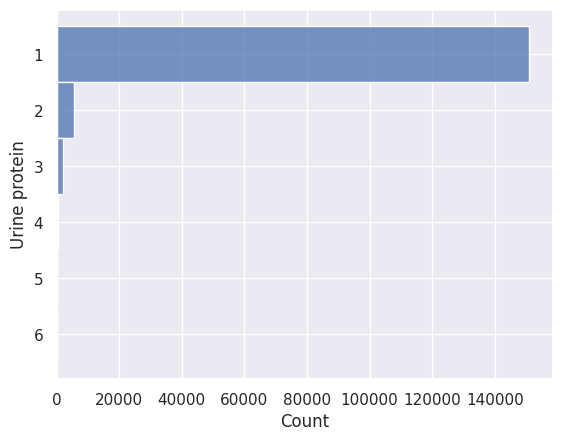

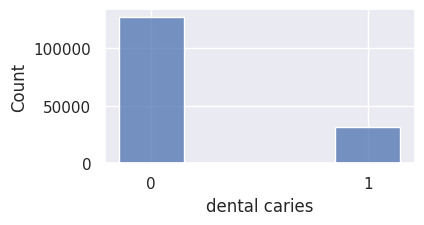

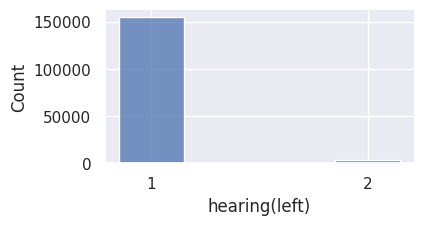

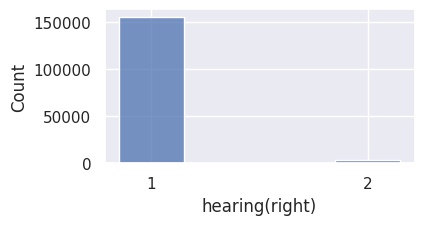

In [ ]:
plot_distributions_quali(df[quali_var])

### Valeurs manquantes

In [ ]:
df_na = df[quali_var].isna()
df_na_sum = df_na.sum()

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='id'>

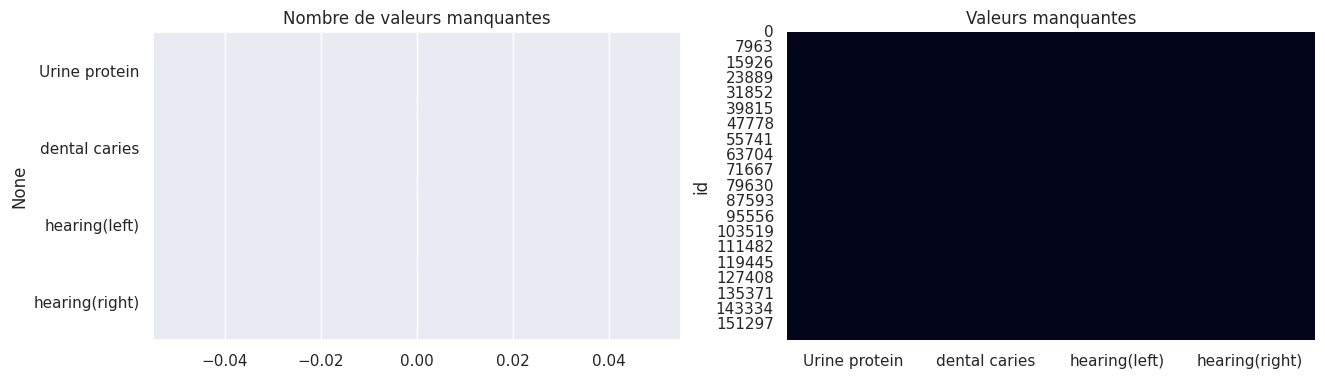

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs manquantes")
sns.barplot(x=df_na_sum.values, y=df_na_sum.index, color="C0", ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df_na, cbar=False, ax=ax[1])

In [ ]:
df_na_sum  # fixme: na are not detected because categories are converted as string I guess?

Urine protein     0
dental caries     0
hearing(left)     0
hearing(right)    0
dtype: int64

### Variable cible

In [ ]:
target_as_str = y.astype(str)

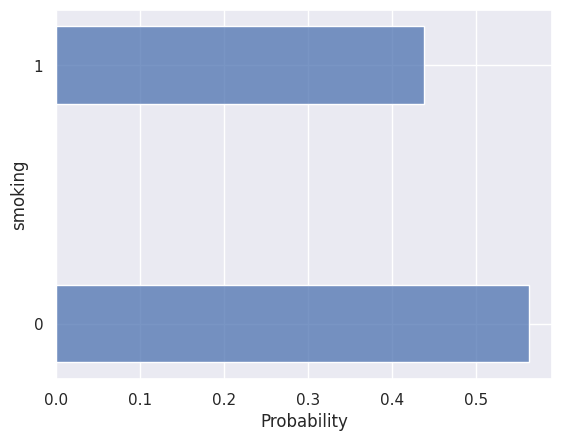

In [ ]:
sns.histplot(y=target_as_str, shrink=0.3, stat="probability")
plt.show()

In [ ]:
pd.concat((y.value_counts(), y.value_counts(normalize=True)), axis=1)

,smoking,smoking
0,89603,0.562635
1,69653,0.437365


## Variable cible en fonction des autres variables

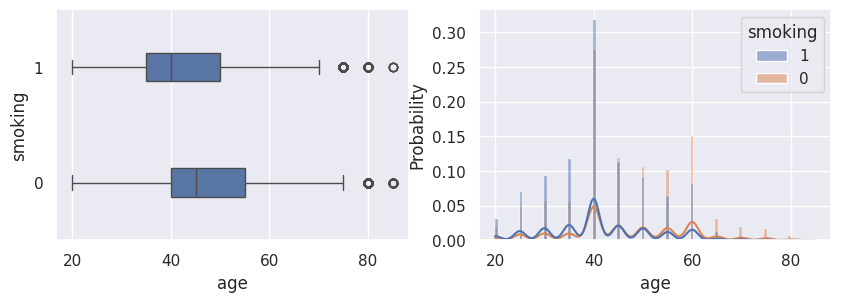

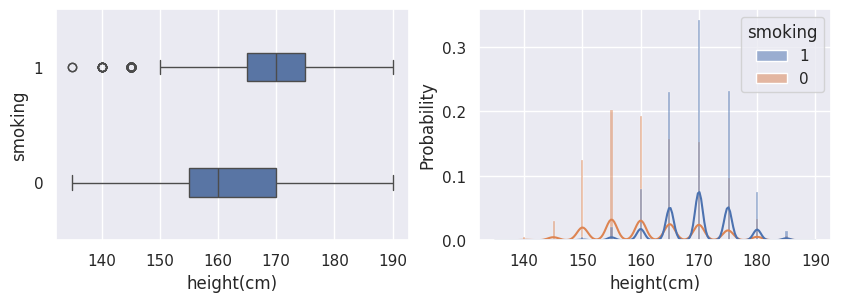

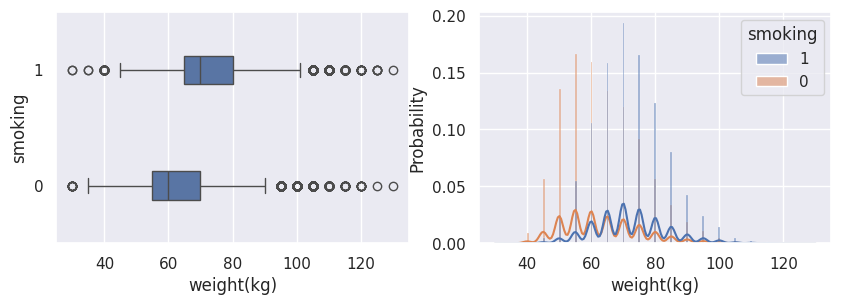

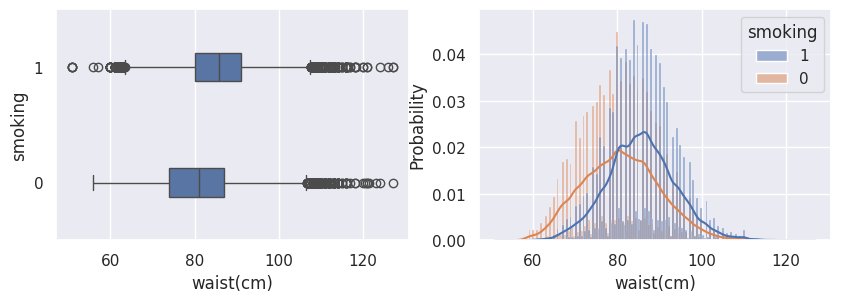

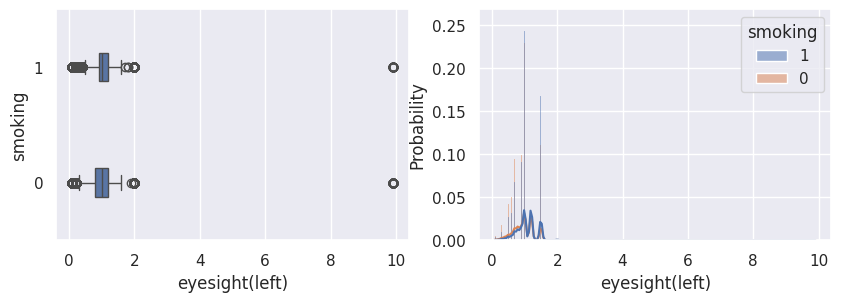

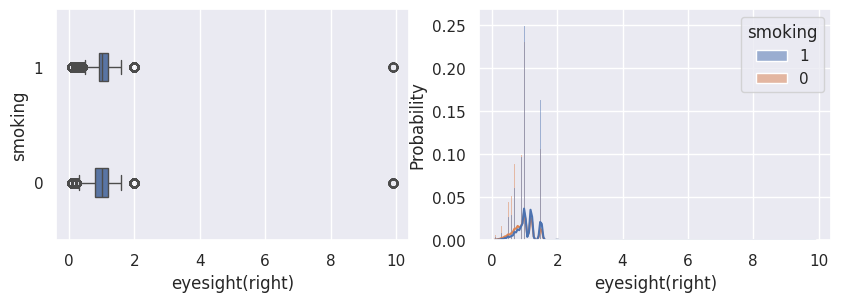

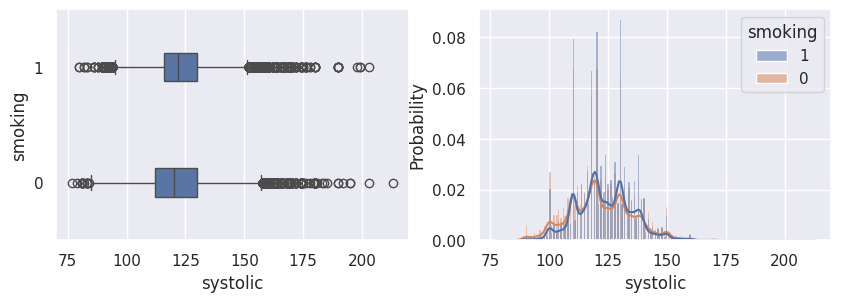

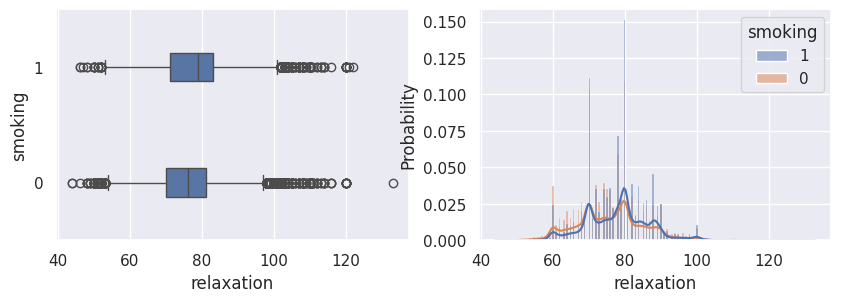

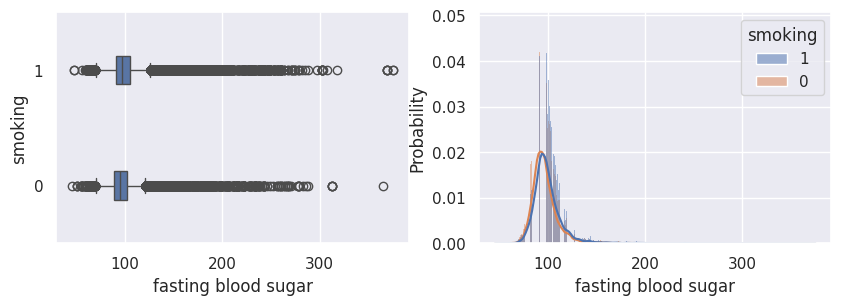

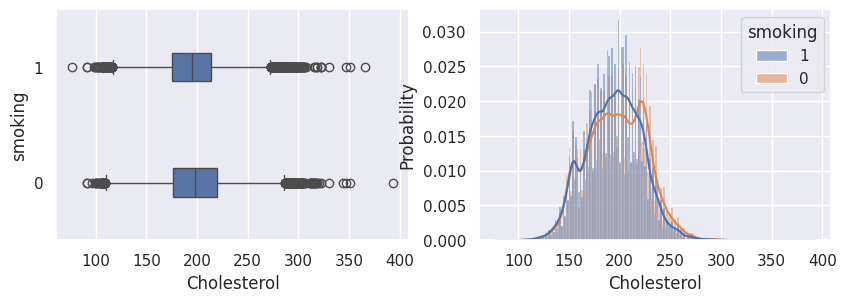

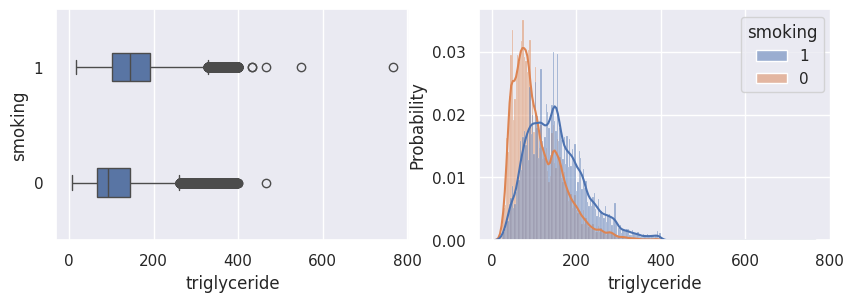

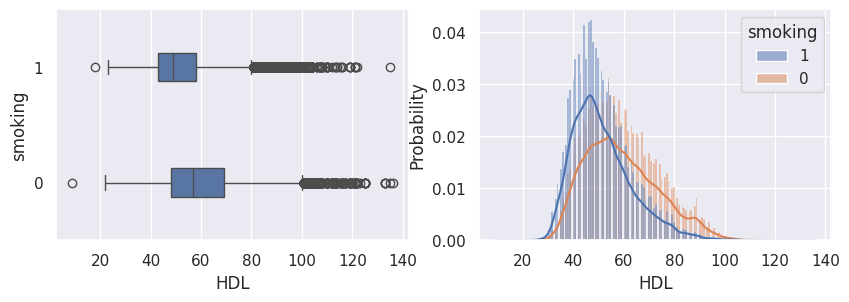

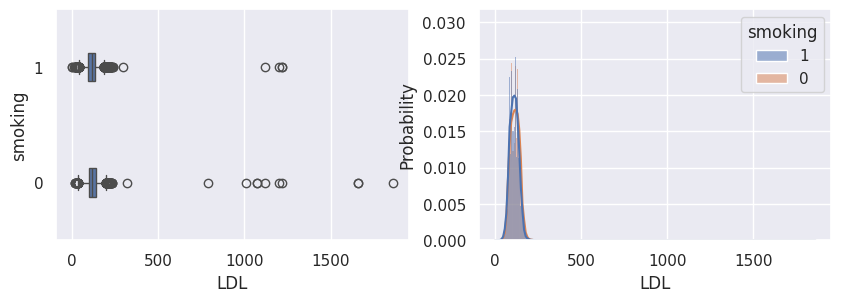

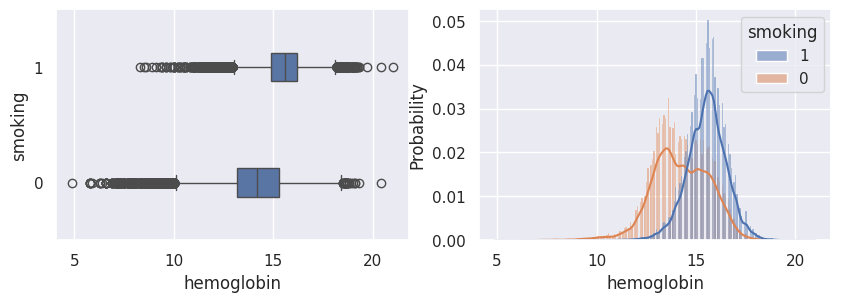

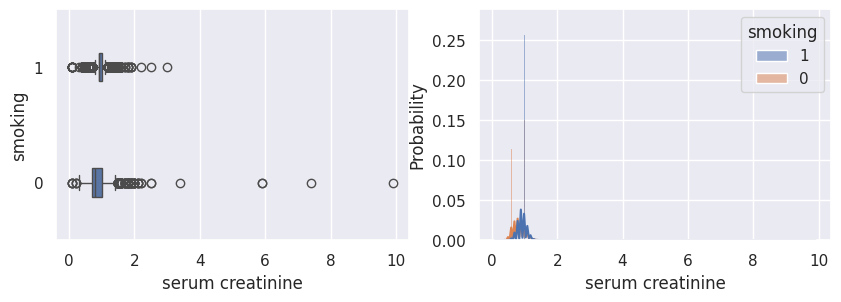

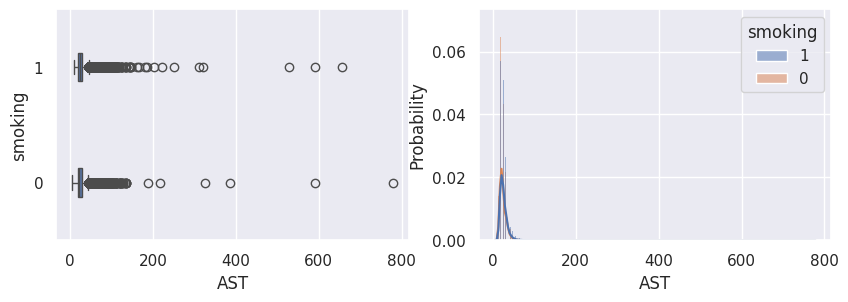

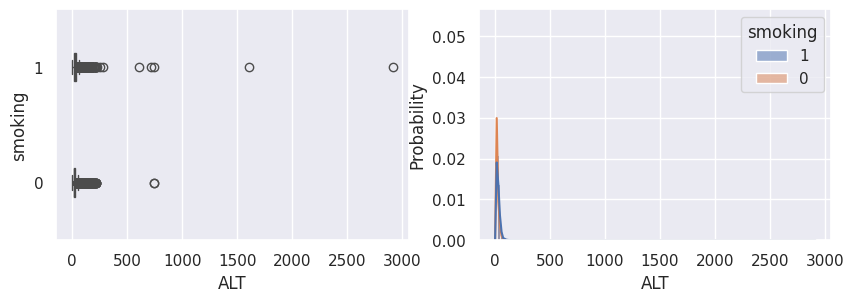

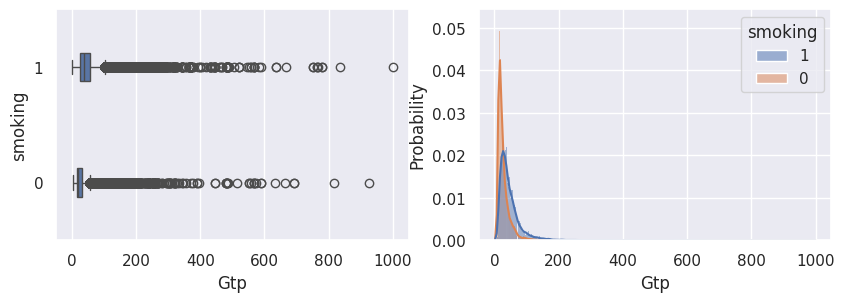

In [ ]:
for var in quanti_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.boxplot(df, x=df[var], y=target_as_str, width=0.25, ax=ax[0])

    sns.histplot(
        df,
        x=df[var],
        kde=True,
        ax=ax[1],
        hue=target_as_str,
        stat="probability",
        common_norm=False,
    )

    plt.show()

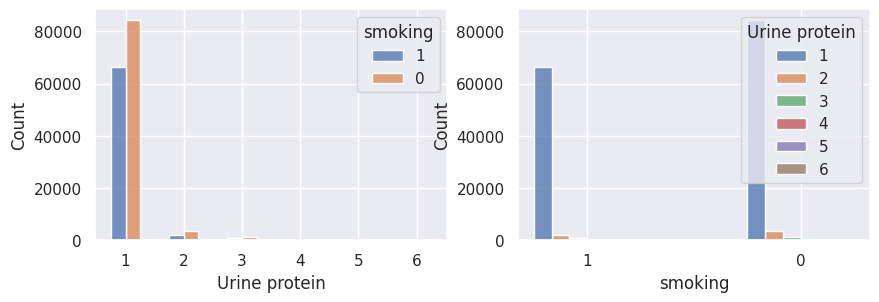

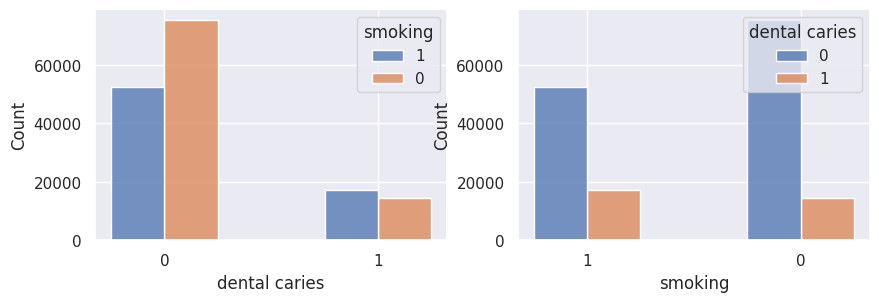

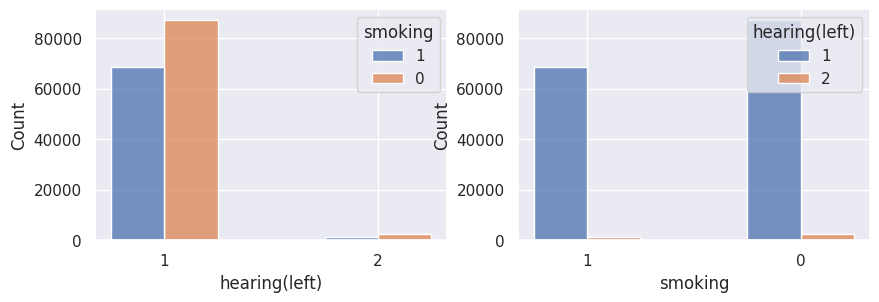

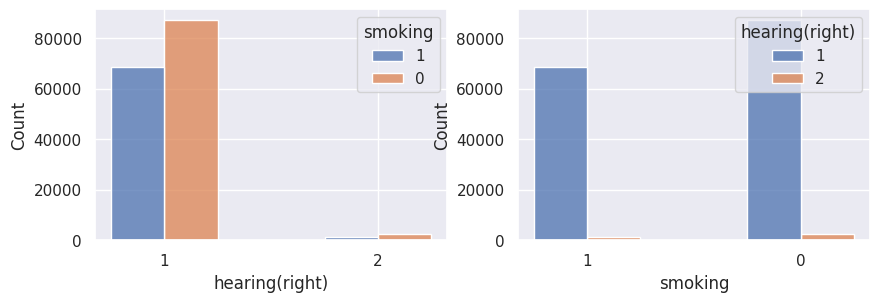

In [ ]:
for var in quali_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(
        df,
        x=df[var],
        hue=target_as_str,
        multiple="dodge",
        shrink=0.5,
        ax=ax[0],
    )

    sns.histplot(
        df,
        hue=df[var],
        x=target_as_str,
        multiple="dodge",
        shrink=0.5,
        ax=ax[1],
    )

    plt.show()

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("data/dataset/processed/train.csv")